NOMBRE: Lenin Hernando Pérez Padilla

PROYECTO: Premios Nobel (Fuente: Programa Ciencia de Datos de DataCamp)

FECHA: Noviembre de 2024

ENUNCIADO

El Premio Nobel ha sido uno de los premios internacionales más prestigiosos desde 1901. Cada año, se otorgan premios en química, literatura, 
física, fisiología o medicina, economía y paz. Además del honor, el prestigio y el importante premio en metálico, el ganador también recibe una 
medalla de oro con una imagen de Alfred Nobel (1833 - 1896), quien estableció el premio.

La Fundación Nobel ha puesto a disposición un conjunto de datos de todos los ganadores del premio desde el inicio de los premios desde 1901 
hasta 2023. El conjunto de datos utilizado en este proyecto proviene de la API del Premio Nobel y está disponible en el archivo nobel.csv en la 
carpeta de datos.

En este proyecto, tendrá la oportunidad de explorar y responder varias preguntas relacionadas con estos datos de ganadores del premio. ¡Y lo 
alentamos a que luego explore otras preguntas que le interesen!

Analice los datos de los ganadores del Premio Nobel e identifique patrones respondiendo las siguientes preguntas:


1) ¿Cuál es el género y el país de nacimiento más comúnmente otorgado?

Primero, se importan las bibliotecas necesarias para realizar los cálculos correspondientes:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

A continuación se importa el archivo csv que contiene los datos:

In [2]:
df = pd.read_csv('nobel.csv')
df.head() #Esta línea muestra las primeras 5 filas del conjunto de datos

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


Posteriormente se muestran el nombre, la cantidad de datos no nulos y el tipo de datos de cada columna:  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

Ahora se muestran la cantidad de filas y columnas del conjunto de datos:

In [4]:
df.shape

(911, 18)

Hay 911 filas y 18 columnas.

A continuación, se elige la columna 'sex' del conjunto de datos df, se cuentan los distintos valores y se ordenan de mayor a menor:

In [5]:
top_genero = df['sex'].value_counts(sort=True)
top_genero

sex
Male      836
Female     49
Name: count, dtype: int64

De acuerdo con la serie top_genero, el género más galardonado es el masculino con 836 registros. 

Con un procedimiento similar, se va a determinar el país más premiado: se elige la columna 'birth_country' del conjunto de datos df, se cuentan los distintos valores y se ordenan de mayor a menor:

In [6]:
top_paises = df['birth_country'].value_counts(sort=True)
top_paises.head()

birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Name: count, dtype: int64

Con base en la serie top_paises, el país más premiado es Estados Unidos con 259 registros.

2) ¿Qué década tuvo la mayor proporción de ganadores del Premio Nobel nacidos en EE. UU. en relación con el total de ganadores en todas las categorías?

Se van a crear dos columnas. La primera se llama df['usa_winner'], en la que se verifica la condición de que el país de nacimiento del ganador corresponde a Estadosi Unidos. Si el valor es verdadero, se cuenta como True (1 como valor numérico); en caso contrario el valor se cuenta como False (0 como valor numérico).

La segunda columna se llama df['decade'], en la que se divide el año que aparece en el conjunto de datos, luego se le asigna el método np.floor para redondear hacia el entero más cercano, menor o igual al número correspondiente. Después ese valor se multiplica por 10 y finalmente se usa el método astype para que los valores correspondan a números enteros:

In [7]:
df['usa_winner'] = df['birth_country'] == 'United States of America'
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)

A continuación se usa el método groupby para agrupar las decadas y las proporciones de los ganadores que pertenecen a Estados Unidos. Como la columna 'usa_winner' está compuesta por unos y ceros, se puede usar el promedio (mean), con el fin de obtener las proporciones (o porcentajes) de ganadores que son de Estados Unidos para cada decada:

In [8]:
ganadores_usa = df.groupby('decade', as_index=False)['usa_winner'].mean()
ganadores_usa

,decade,usa_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


Posteriormente se crea una variable, mayor_decada_usa, para almacenar de manera descendente los valores de la columna usa_winner, mediante uso del método sort_values (y colocando False en el parámetro ascending). Luego se llama a la variable mayor_decada_usa y se usa el método head(1) para seleccionar la década con el mayor porcentaje de ganadores de Estados Unidos:  

In [9]:
mayor_decada_usa = ganadores_usa.sort_values('usa_winner', ascending=False)
mayor_decada_usa.head(1)

,decade,usa_winner
10,2000,0.422764


La década corresponde al 2000, con una proporción de 0,422764 (ó 42,2764%). Esto significa que en la década del 2000, el 42,2764% de los ganadores del Premio Nobel nacieron en Estados Unidos.

Como ejercicio adicional, se muestra un gráfico de línea para ilustrar cómo se han comportado las proporciones de los ganadores de Estados Unidos a través de las decadas: 

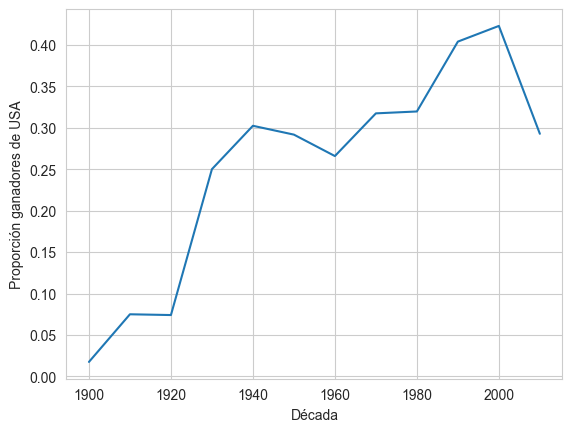

In [10]:
sns.set_style('whitegrid')
sns.lineplot(x='decade', y='usa_winner', data=ganadores_usa).set(xlabel='Década', ylabel='Proporción ganadores de USA')
plt.show()

3) ¿Qué combinación de década y categoría del Premio Nobel tuvo la mayor proporción de mujeres galardonadas?

Se crea una nueva columna, female_winner. La condición a evaluar es que el sexo del ganador es mujer (True ó 1 si es mujer y False ó cero si es hombre). Además, en el group_by se deben agrupar dos variables: primero la década y luego la categoría. Se emplea de nuevo el promedio (mean) para determinar las proporciones (o porcentajes) de las mujeres ganadoras de cada categoría, ya que la columna female_winner está compuesta por unos y ceros:

In [11]:
df['female_winner'] = df['sex'] == 'Female'
mujeres_ganadoras = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
mujeres_ganadoras

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.125000
64,2010,Peace,0.400000


A continuación, se crea una nueva variable, mayor_decada_mujeres, para almacenar en orden descendente la proporción de mujeres que ganaron el Premio Nobel con base en las distintas categorías. Se invoca a la nueva variable con head(1) para mostrar la década con la mayor proporción de mujeres ganadoras y en cuál categoría:

In [12]:
mayor_decada_mujeres = mujeres_ganadoras.sort_values('female_winner', ascending=False)
mayor_decada_mujeres.head(1)

,decade,category,female_winner
64,2010,Peace,0.4


En este caso, la decada corresponde a 2010, con una proporción de 0,4 (ó 40%) en la categoría de la Paz.

Como ejercicio adicional, se muestra cómo cambiaron las proporciones de mujeres ganadoras en cada categoría a través de las décadas. Al tratarse de décadas (unidad de tiempo), se utiliza un gráfico de líneas: 

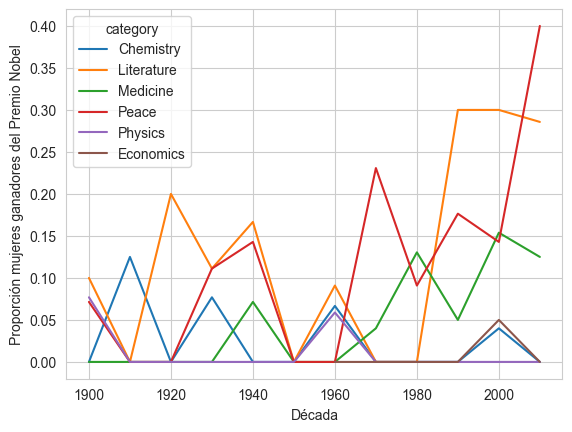

In [13]:
sns.set_style('whitegrid')
sns.lineplot(x='decade', y='female_winner', hue='category', data=mujeres_ganadoras).set(xlabel='Década', ylabel='Proporción mujeres ganadores del Premio Nobel')
plt.show()

4) ¿Quién fue la primera mujer en recibir un Premio Nobel y en qué categoría?

En una variable llamada mujeres, se almacenan únicamente las filas que cumplan con el criterio de que el sexo sea mujer. A continuación se ordenan las filas en orden ascendente de acuerdo con el año y finalmente se invoca a la variable mujeres con el método head(1) para mostrar la primera fila: 

In [14]:
mujeres = df[df['sex']=='Female']
mujeres.sort_values("year")
mujeres.head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


En este caso, la primera mujer que recibió un Premio Nobel fue Marie Curie, en la categoría de Física, en 1903.

5) ¿Qué individuos u organizaciones han ganado más de un Premio Nobel a lo largo de los años?

Para esta pregunta, se crea una variable llamada columnas. En ella se van a almacenar las columnas full_name, year, categorý, sex y laureate_id. A continuación, se crea una nueva variable llamada máximos ganadores, para almacenar los individuos y organizaciones que más veces ganaron un Premio Nobel. Se utiliza emplea el método groupby en la variable columnas, para agrupar las filas con base en el full_name. Se aplica un filtro tipo lambda, en el que únicamente aparezcan los nombres de los individuos y organizaciones que más veces ganaron el Premio Nobel (mínimo 2 veces). Se organizan los registros primero por el laureate_id y luego por el year. Finalmente se invoca a la variable mayores ganadores con el método head(10) para mostrar las primeras 10 filas:

In [15]:
columnas = df[["full_name","year","category","sex", "laureate_id"]]
mayores_ganadores = columnas.groupby("full_name").filter(lambda group: len(group) >= 2).sort_values(["laureate_id", "year"])
mayores_ganadores.head(10)

,full_name,year,category,sex,laureate_id
19,"Marie Curie, née Sklodowska",1903,Physics,Female,6
62,"Marie Curie, née Sklodowska",1911,Chemistry,Female,6
298,John Bardeen,1956,Physics,Male,66
424,John Bardeen,1972,Physics,Male,66
278,Linus Carl Pauling,1954,Chemistry,Male,217
340,Linus Carl Pauling,1962,Peace,Male,217
306,Frederick Sanger,1958,Chemistry,Male,222
505,Frederick Sanger,1980,Chemistry,Male,222
89,Comité international de la Croix Rouge (Intern...,1917,Peace,NaN,482
215,Comité international de la Croix Rouge (Intern...,1944,Peace,NaN,482


Dentro de los mayores ganadores del Premio Nobel se destacan Marie Curie, John Bardeen, Linus Carl Pauling, Frederick Sanger y el Comité de la Cruz Roja Internacional.

CONSIDERACIONES ADICIONALES

El conjunto de datos presenta valores nulos (NaN) y hay varios motivos:

1) Hay tres tipos de ganadores: hombre, mujer y organizaciones. Si hay información correspondiente a hombres y mujeres, no hay necesidad de rellenar la información de organizaciones (y viceversa).

2) Hay una columna llamada motivation. Solo se registran 823 valores no nulos. Sin embargo, para las preguntas consideradas, no se tiene en cuenta esta columna.

3) Hay ganadores que no pertenecen a instituciones (organization_name, organization_city), como por ejemplo literatura y paz.

4) Hay ganadores que, a fecha del año 2016, todavía siguen vivos, por lo que las columnas death_city, death_country y death_year están vacías.

Para este proyecto, la falta de limpieza de datos no afecta el desarrollo de los cálculos. Sin embargo, es necesario realizar la limpieza de datos: revisar si hay valores nulos y cómo se deben tratar. Así mismo, revisar si hay valores duplicados y los tipos de valores de cada columna.